### Análisis de Redes Criminales

## Introducción

En este trabajo nos ponemos aplicar el análisis de redes al análisis de redes criminales. Nuestra pregunta consiste en analizar bases de datos sobre delitos, para entender si, detrás de ellos, existen redes criminales y cuál es su forma. 
Para ello, tomaremos dos bases de datos de delitos en Montreal, Canada. 
1. La Red Caviar, consiste en una base de **describe la base**
2. La red Cooffending, consiste en bases de datos sobre personas que fueron aprendidas comentiendo un delito. 


En ambos casos, el objetivo será el mismo, tratar de determinar si existen lazos o comunidades criminales, de modo que estos delitos no se han dado de forma aislada si no a partir de grupos organizados . 

## Metodología

Para demostrar la pregunta de investigación nos basaremos en las herramientas propias del análisis de redes. Presentamos dos análisis de redes criminales pero con diferentes propositos. Por un lado, el primer análisis sobre la red Caviar, que evalua la evolución de una red de sospechosos con base en las llamadas telefónicas que ellos realizan, nos permite utilizar diferentes medidas de centralidad y observar su evolución en el tiempo para poder hacer un diagnostico del estado de la red. Por el otro lado, los datos de crimen en Quebec, de considerablemente mayor dimensionalidad, nos permiten realizar una detección de comunidades asincrónica en la que el análisis con medidas de centralidad se realiza ya para cada comunidad. 

Para realizarlos aprovecharemos las propiedades de la matriz de adjacencia; las herramientas de analisis de centralidad y las herramientas de detección de comunidades.

### Matriz de adyacencia

Los datos de una red se pueden representar de distintas maneras. Una primera manera es con una lista de pares de vértices o nodos que están conectados por una arista. Una segunda manera posible de representar una red mediante una matriz de adyacencia. La matriz de adyacencia para una red es la matriz $A$ tal que:

$$A_{ij}=1$$

si existe una arista de $i$ a $j$. En el caso no dirigido, $A$ es una matriz simétrica. 

La ventaja de la representación en una matriz de adyacencia esque podemos usar una matriz rala lo cuál nos permite eficientizar la cantidad de cálculo y en consecuencia el tiempo de computo necesario para realizar operaciones. 

Para este proyecto, usamos una representación de una matriz de adyacencia dirigida para los datos de la red Caviar y una matriz no dirigida de adjacencia rala para los datos de crimen en Quebec debido a la cantidad de nodos y aristas. Aunque la representación en un grafo la haremos no dirigida en ambos casos.

G_2.number_of_nodes() #adecuar para red global

G_2.number_of_edges()

Asimismo cabe mencionar que como en la red caviar hemos decidido incluir la dimensión temporal, esto implica que tenemos $t$ matrices de adjacencia para cada periodo $t$. Por el contrario, para el caso de crimen en Quebec, al no estar analizando una red criminal como tal sino la ocurrencia total de crimen, hemos decidido no incluir la dimensión temporal con el fin que nuestra matriz de adjacencia sea única para los años de la base de datos. Esto nos permite tener una imagen de las conexiones independientemente de su evolución en el tiempo.

Los datos de la red Caviar ya venían en un formato de matriz de adyacencia, por lo cuál su adecuación no presento mayor reto. En cambio, para los datos de Quebec si tuvimos que hacer un preprocesamiento. Los datos vienen en un formato de tabla en el que la unidad es un suceso que está ligado a un crimen en particual (con un identificador único) y a una persona en particual (también con un identificador único), además, cada observación viene acompañada de información contextual como lugar del suceso, tipo de delito y demás características sociodemográficas del individuo. 

Para obtener una matriz cuadrada de adjacencia que ligue a cada individuo $i$ con cada individuo $j$, primero necesitamos obtener una matriz que ligue a cada individuo $i$ con cada crimen $k$. Esta segunda matriz la obtenemos transformando la base de datos original a un formato *wide* donde cada fila es un individuo y cada columna un suceso de crimen, llamemosla matriz auxiliar. Posteriormente obtenemos la matriz que necesitamos al multiplicar la matriz auxiliar por su transpuesta. 

$$A_{ixi}=A_{ixk} \cdot A_{ixk}^T$$

Asimismo, pudimos aumentar la eficiencia de los cálculos para ambas bases de datos al realizar algunas transformaciones de las variables como por ejemplo numerar de manera consecutiva desde el 1 hasta $n$ cada nodo, de tal manera que no existan saltos en la numeración y que nuestra matriz de adyacencia no crezca inecesariamente.


### Medidas de centralidad

Una vez obtenidas las matrices de adyacencia, podemos representar la red graficamente o aplicar las medidas de centralidad. Para esta investigación nos limitaremos a aquellas que vimos en el curso: centralidad de grado, intermediación y eigenvector.

**Grado**

Sea $G$ una gráfica no dirigida y sea $A$ la matriz de adyacencia, la centralidad de grado para un nodo $i$ es:

$$C_g(i)=\sum_{j \neq i} A{i,j}$$

Esta medida nos permite medir de manera muy sencilla y directa la importancia de cualquier nodo mediante la cantidad de aristas sin contemplar la topologia de la red.

**Intermediación**

La medida de centralidad de intermediación de un nodo $u$ se define como:

$$C_b(u)=\sum_{j<k, u \neq j, u \neq i} \frac{g(j,k|u)}{g(j,k)}$$

donde el denominador se refie a la cantidad de caminos más cortos distintos entre $j$ y $k$; el numerador a la cantidad de caminos más cortos distintos entre $j$ y $k$ que pasan por $u$. Esta medida nos es muy util para encontrar nodos clave en la topologia de la red.

**Eigenvector**

Esta medida considera que la importancia de un nodo está dado por la suma normalizada de las importancias de sus vecinos. De esta forma, es importante estar cercano a nodos importantes (como en cercanía), pero también cuenta conectarse a muchos nodos (como en grado)

### Medidas de detección de comunidades

Las redes sociales y otras comunmente tienen subgrupos de vértices o nodos tales que hay una gran cantidad de conexiones entre ellos y menos conexiones fuera de ese grupo, o comunidades que es posible identificar. Asimismo muchas veces las comunidades son tan explicitas que las encontramos en alguna subred totalmente desconectada de la red principal. Por ello, la principal herramienta que usaremos es el averiguar primero la cantidad y el tamaño de cada subred o componente, y en segundo lugar, un análisis de modularidad, a partir de ahí podemos evaluar la denisdad de la subred mediante el coeficiente de *cluster*.

**Componentes más grandes**

Esta tecnica consiste simplemente en identificar cuantas subredes desconectadas existen en mi espacio. A veces una misma red sufre separaciones y adiciones a través del tiempo, otras veces, un espacio puede tener de manera sincrónica diferentes subredes habitando en el. En datos reales no siempre debe haber una conexión entre las subredes por lo que es probable que alguans sean totalmente aisladas.

**Modularidad**

Se refiere la fracción de aristas del total de aristas que conecta vértices dentro del mismo grupo:

$$\frac{1}{2m} \sum_{u,v} A_{u,v} I(g(u),g(v))$$

donde la primera parte de la ecuacion se refiere al total de aristas en la red y la segunda parte, la función $I$, indica que se suma la arista solo si $g=h$, (solo es igual a 1 cuando $u$ y $v$ están conectados y $u$
y $v$ pertenecen al mismo grupo)

La modularidad mide que tan fuertemente puede dividirse una red en módulos (grupos, clusters o comunidades disjuntas). Una división en módulos es fuerte cuando los nodos de cada módulo están bien conectados entre ellos, y menos conectados a nodos fuera de su módulo.

**Coeficiente cluster**

El coeficiente de cluster intenta medir que tan densa es una red, es util para identificar que tan consistente es una subred o una comunidad. 

$$ C_i= \frac{1}{k_i(k_i-1)}\sum _{j,k} A_{jj} A_{jk} A_{ki}$$

Intuitivamente se refiere a la cantidad de tripletas que se forman entre sus nodos de la cantidad total de tripletas posibles.



imports

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
from utils import * 
import utils
import networkx as nx
import pygraphviz
import matplotlib.pyplot as plt


## 1. Base de datos Caviar

Caviar se refiere a una investigación criminal coordinada por autoridades de Canadá durante los años 1994 a 1996. El objetivo de esta investigación era entender las interacciones entre los distintos criminales que operaban en Canadá. Durante el periodo de dos años, las autoridades canadienses intervinieron 11 veces las comunicaciones de los criminales para entender como se relacionaban. Se generó un conjunto de datos distinto con cada una de estas intervenciones.

Los datos de esta investigación permiten analizar los cambios en la red de criminales a través del tiempo y el cambio de circunstancias. Se dio seguimiento a un total de 110 criminales, de los cuales 82 eran traficantes de drogas y 28 no traficantes.

Comenzamos descargando la base de datos

In [5]:
phases, G = download_caviar_data()

### Entendiendo la matriz de adyacencia

Ahora examinamos un poco más como está configurada la matriz de adyacencia con la que estaremos trabajando en este análisis. Dado que se trata de un caso **no dirigido**, se tienen 11 matrices **simétricas de adyacencia**. Cada matriz relaciona al grupo de criminales con base en interacciones entre ellos.

Tomamos como ejemplo la 1ra matriz de adyacencia de las 11 disponibles:

In [6]:
phases[1]

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8
n1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
n4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
n83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
n3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
n5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
n85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
n90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Primera exploración de las redes a través del tiempo

Comenzamos explorando las matrices de adyacencia y como estas fueron evolucionando a lo largo de los 11 cortes de tiempo (intervenciones). A continuación se presenta una gráfica con la evolución del conteo del número de nódos y conexiones.

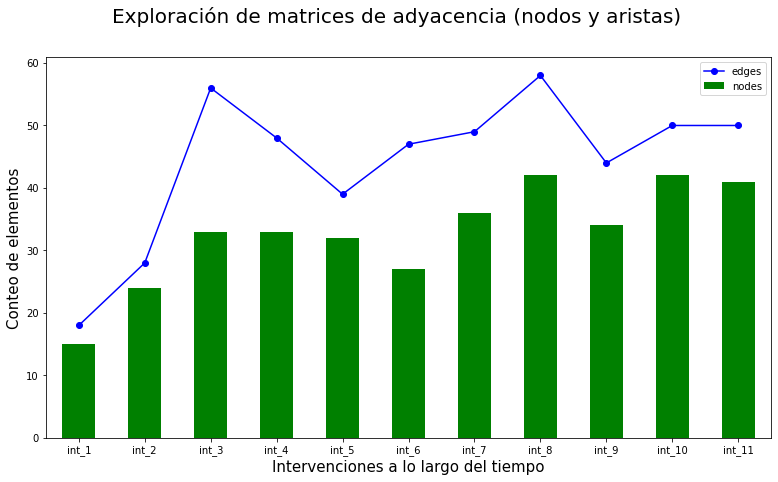

In [7]:
adys_in_time_plot(G)

Los registros de las autoridades indican que hay 4 fases importantes en las que podemos clasificar cada una de las 11 intervenciones. A continuación enlistaremos los sucesos más importantes de cada fase, así como atributos presentes en la gráfica de *Exploración de matrices de adyacencia (nodos y aristas)* que los sustentan:

- **Fase 1: crecimiento de la red (intervenciones 1-3)**
    - Sucesos más importantes en registros:
        - En esta fase las autoridades recabaron información de la red por primera vez.
        - Las autoridades no intervinieron con la red.
    - Observaciones en la gráfica:
        - Vemos un crecimiento importante, tanto en el número de nodos (de 15 a 33), como en el número de aristas (de 18 a 56).
        

- **Fase 2: decomisión y cambio de actividades (intervenciones 4-5)**
    - Sucesos más importantes en registros:
        - Se hace la primera decomisión de drogas a la red criminal.
        - Las autoridades implementan medidas para dificultar la operación de la red.
        - Ingresa a la red un traficante colombiano que juega un papel importante en la red.
    - Observaciones en la gráfica:
        - La red solamente pierde 1 nodo, pero sus conexiones bajan drasticamente (de 56 a 3)
        

- **Fase 3: reestructuración (intervenciones 6)**
    - Sucesos más importantes en registros:
        - La red criminal se reorganiza ante la entrada del participante colombiano.
    - Observaciones en la gráfica:
        - El número de nodos baja considerablemente (de 32 a 27), pero las conexiones aumentan (de 39 a 37)
        

- **Fase 4: red bajo estrés (intervenciones 7-11)**
    - Sucesos más importantes en registros:
        - Las autoridades realizan varias decomisiones de drogas a la red criminal.
        - Se implementan varias acciones por parte de las autoridades que obstaculizan la operación de la red.
    - Observaciones en la gráfica:
        - Se observa variabilidad en el número de nodos y aristas de la red en esta fase.

### Representación gráfica de las redes a lo largo del tiempo

Ya con una idea más clara de lo que sucedió con la red de criminales a lo largo del tiempo, generamos visualizaciones de la red en todos los momentos del tiempo:

#### Fase 1

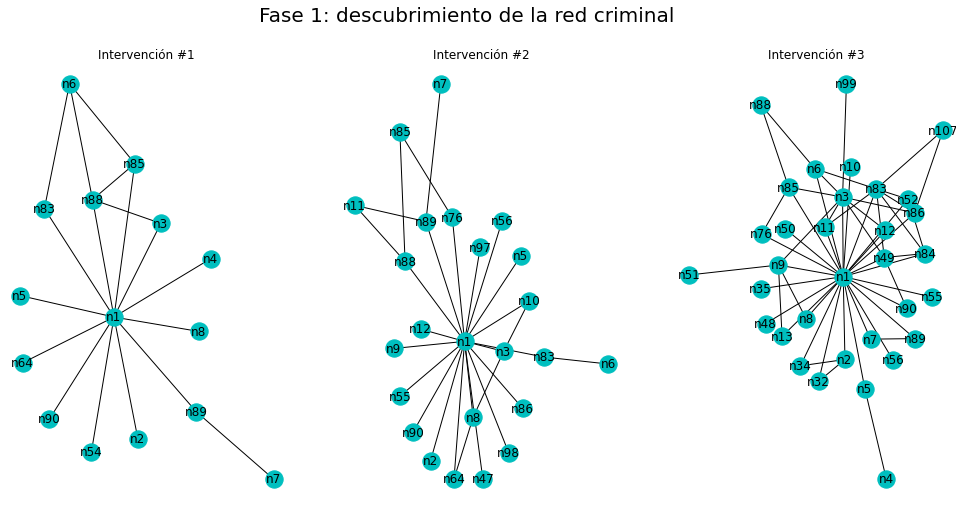

In [16]:
create_fase_nxs(G, range(1, 4), 0, "Fase 1: descubrimiento de la red criminal", "c")

#### Fase 2

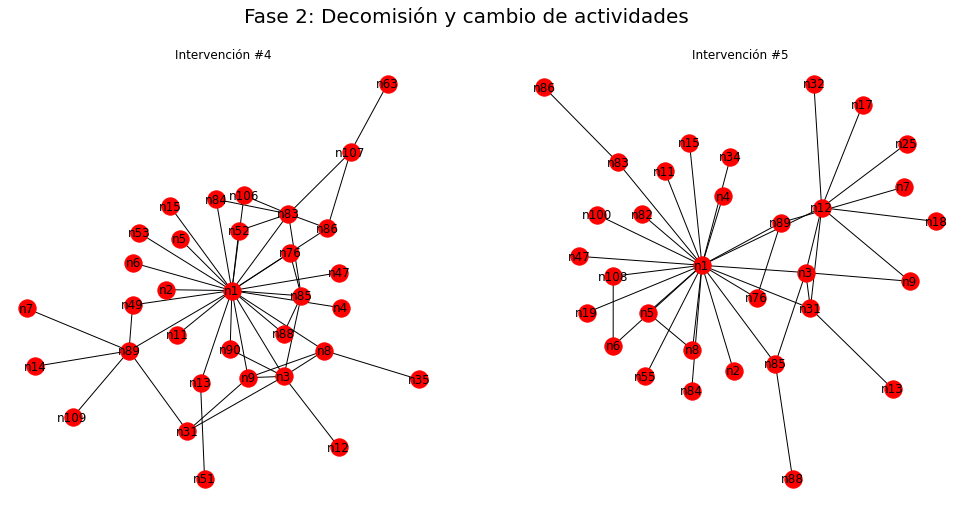

In [17]:
create_fase_nxs(G, range(1, 3), 3, "Fase 2: Decomisión y cambio de actividades", "r")

#### Fase 3

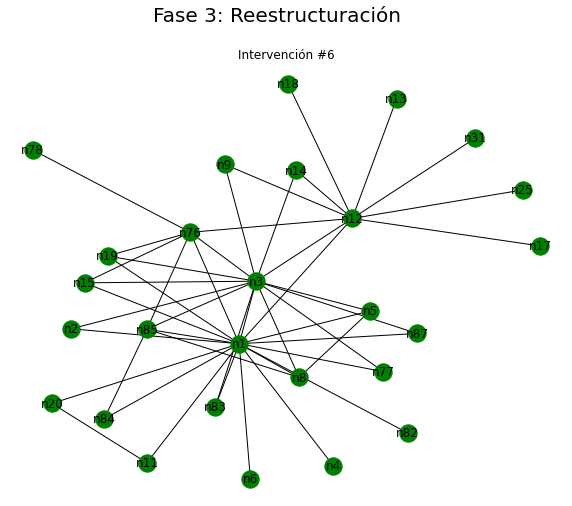

In [18]:
create_fase_nxs(G, range(1, 2), 5, "Fase 3: Reestructuración", "g")

#### Fase 4

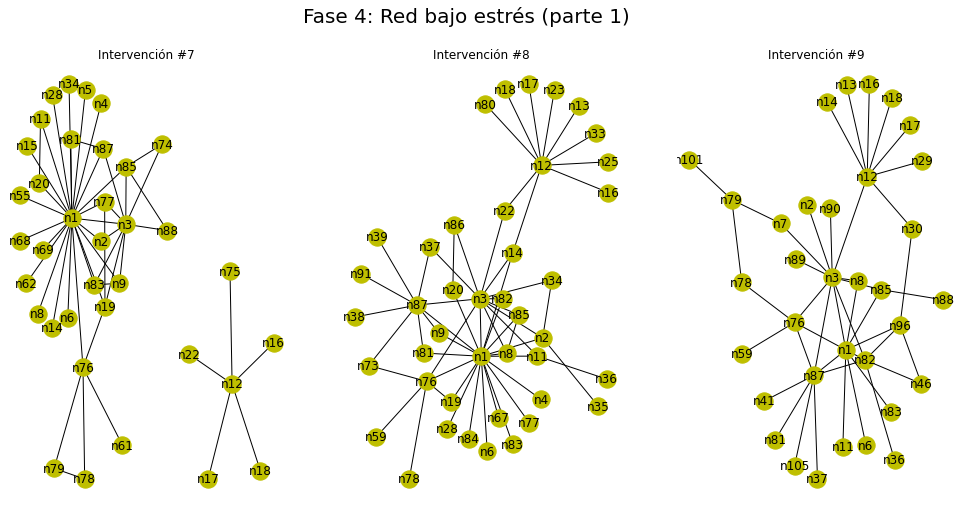

In [19]:
create_fase_nxs(G, range(1, 4), 6, "Fase 4: Red bajo estrés (parte 1)", "y")

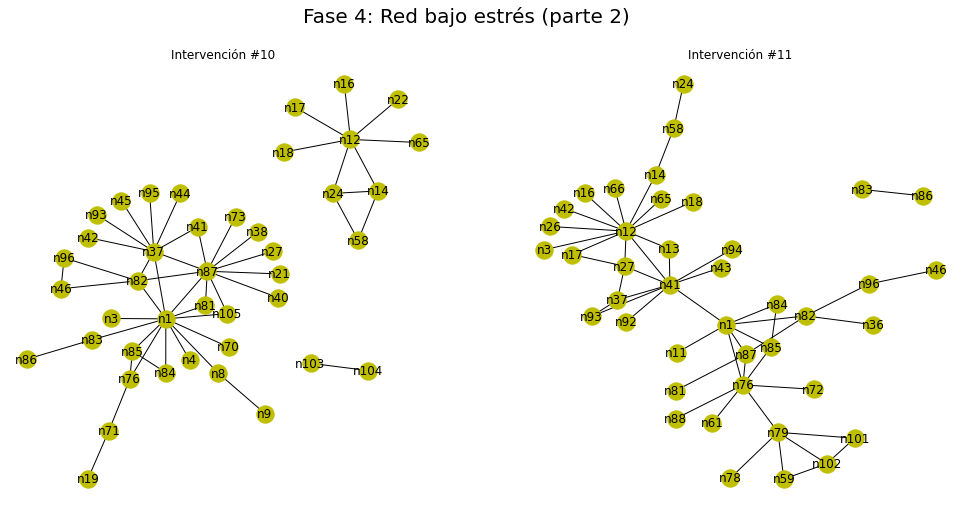

In [20]:
create_fase_nxs(G, range(1, 3), 9, "Fase 4: Red bajo estrés (parte 2)", "y")

### Profundización en el análisis de las redes en el tiempo

Ahora que tenemos una idea más clara de la red criminal y su evolución a lo largo del tiempo, continuaremos con un análisis más profundo de esta apoyándonos de la *teoría de redes*.

Con el fin de simplificar el análisis, optamos por hacer una selección de 5 redes que consideramos representativas de cada una de las fases mencionadas. A continuación presentamos las 5 intervenciones seleccionadas:

- **Fase 1: crecimiento de la red (intervenciones 1-3)**
    - Intervención #2

- **Fase 2: decomisión y cambio de actividades (intervenciones 4-5)**
    - Intervención #5

- **Fase 3: reestructuración (intervenciones 6)**
    - Intervención #6

- **Fase 4: red bajo estrés (intervenciones 7-11)**
    - Intervención #8
    - Intervención #10

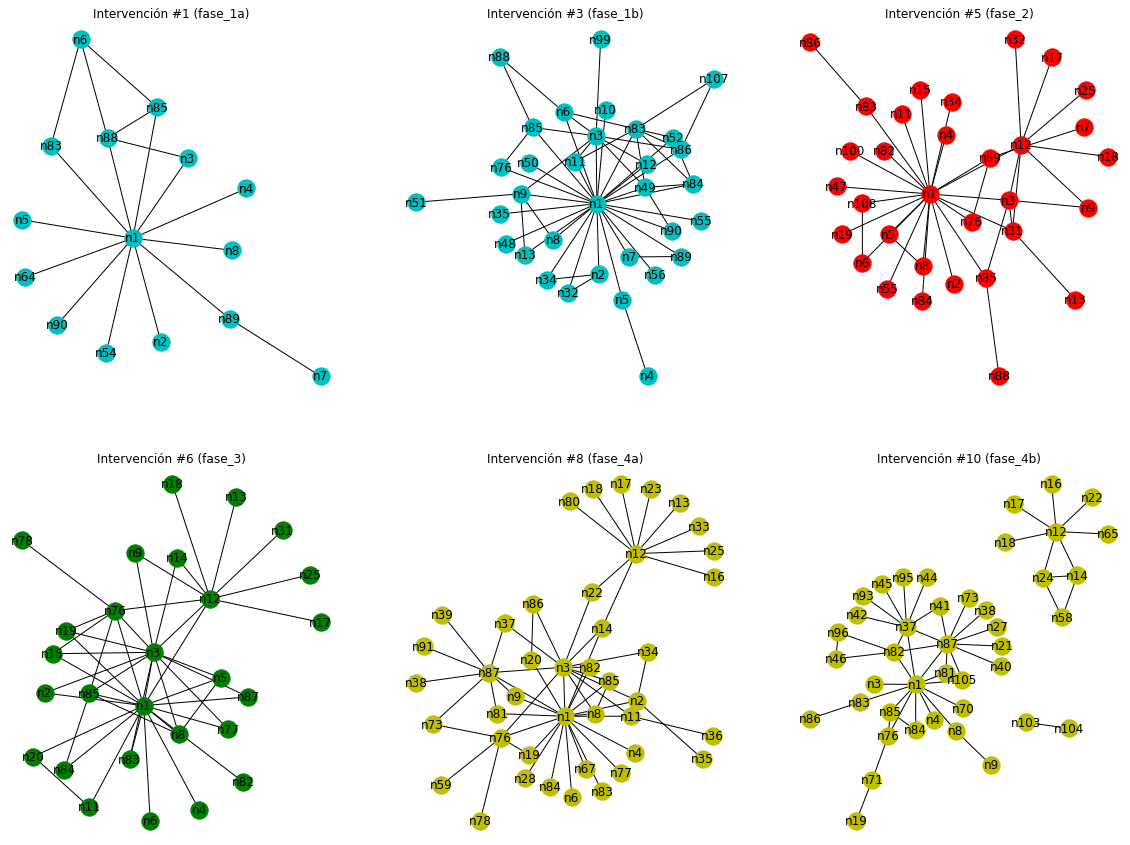

In [23]:
networks_deep_analysis(G, nums_cols, "visual")

Con base en esta primera exploración, notamos lo siguiente:

- En la mayoría de las intervenciones observamos que solo hay una gran red de criminales que no está seccionada. Solamente en algunos casos (e.g. Intervención #10 de la Fase 4) vemos que se crean nuevas redes que operan de forma independiente.

- El criminal representado por el nodo *n1* (Daniel Serero) juega un rol central en la red.

- A partir de la Fase 2, el criminal representado por el nodo *n12* comienza a jugar un papel más importante en la red criminal.

## 2. Base de datos Cooffending 

La base de datos Cooffending cuenta con más de un millón doscientas mil entradas, cada una de las cuales incluye, entre otras columnas, un identificador del criminal, identificador del crimen en el que fue aprendido, tipo de crimen que estaba cometiendo. 
A partir de esta información el primer abordaje consistió en la construcción de una matriz de adyacencia y una gráfica de la red general. 
Una base de datos de esta magnitud hace difícil poder diferenciar el ruido de los fenómenos que es buscan analizar. La primera impresión fue decepcionante, porque encontramos que, en la gran mayoría de los casos, se trataba de redes de dos personas que habían cometido uno o varios crímenes juntas. Esto no respondía a la gigantesca red criminal que, en nuestra ingenuidad, habíamos imaginado que ibamos a encontrar. 

Cargamos los datos:

In [3]:
df = pd.read_csv("../Cooffending/Cooffending.csv")


Preprocesamiento de datos:

In [4]:
df=df.drop_duplicates(subset =["OffenderIdentifier","CrimeIdentifier"])
A=create_adj_matrix(df)
G= create_graph_object(A)

Filtramos solo las aristas que tienen más de 30 hechos en comun: 

In [5]:
G_2 = filter_number_connections(30, A, G)

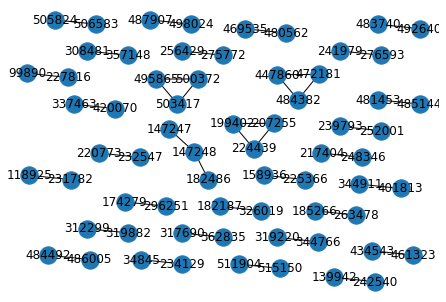

In [6]:
nx.draw(G_2, pos=nx.drawing.nx_agraph.graphviz_layout(G_2), with_labels=True)

La gráfica de aquí arriba es solo ilustrativa (del problema al que nos enfrentamos en un inicio. En primer lugar, se observan muchas redes de solo 2 nodos, lo que no estaría dando cuenta de la existencia de ninguna red criminarl. En segundo lugar, fue necesario poner un filtro de 30, es decir, 30 delitos en común entre nodos, lo cual es un número excesivamente alto. Sin embargo, con números menores, la gráfica devuelve una visualización llena de puntos incomprensible. 

Asi, nos enfrentamos a una gráfica que en principio no mostraba ninguna red criminal pero que, además, debido a su tamaño se hacía muy difícil encontrar el modo de filtrar los datos, de modo de no excluir información relevante. 
Por ello, decidimoa utilizar la herramienta de visualización de redes Gaphi, que nos permitió una visualización más detallada de los datos.  
Aquí pudimos ver que, si bien en la mayoría de los casos se trataba de redes que únicamente tenían 2 nodos, también había algunos casos de redes un poco más grandes. Así, nos avocamos al análisis de estas redes, para tratar de comprender quiénes eran sus miembros, qué tipo de delitos cometían, en qué municipalidades actuaban y, para comprender la estructura de la red criminal que componían. 

In [7]:
## Visualizacion Gaphi ::.. 

## Análisis de subredes criminales Cooffending 

La visualización de Gaphi nos permitió detectar pequeñas redes de personas que habían reincidido juntos, en el contexto de un gran ruido de crímenes aislados cometidos únicamente por dos personas. Por eso, nos avocamos al estudio de algunas de esas subredes

Es decir, a partir de una idea, quizás demasiado influenciada por las películas, de una gran red de crimen organizado, pasamos a la búsqueda de algo más realista para este caso: el análisis de pequeñas redes de criminales organizados

In [8]:
G_3 = filter_number_connections(4, A, G)

In [9]:
Gccr = sorted(nx.connected_components(G_3), key=len, reverse=True)


Prueba 
Vamos a filtrar con 1 componentes:

In [10]:
G_4 = filter_number_connections(1, A, G)
Gccr_2 = sorted(nx.connected_components(G_3), key=len, reverse=True)


Observando los componentes de manera ordenada vimos que habían unas 20 redes que eran las más importantes. Graficandolas se puede observar algo más comprensible: 

In [11]:
t= Gccr[0:20]
flat_list = [item for sublist in t for item in sublist]
Gr_top_20 = G.subgraph(flat_list)
df_filtered_20 = df[df['Criminales'].isin(Gr_top_20)]
top_20_adj_matrix = create_adj_matrix(df_filtered_20)
top_20_graph = create_graph_object(top_20_adj_matrix)


/Users/sansansansan/repos_itam/final_metodos/criminal_communities/adj_matrix/utils.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
/Users/sansansansan/repos_itam/final_metodos/criminal_communities/adj_matrix/utils.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('int64')
/Users/sansansansan/repos_itam/final_metodos/criminal_communities/adj_matrix/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

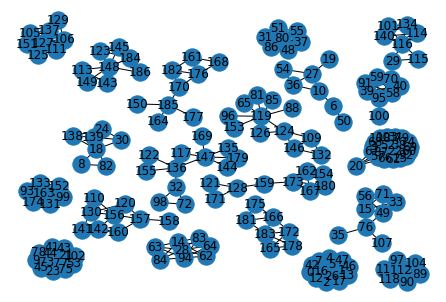

In [12]:
nx.draw(top_20_graph, pos=nx.drawing.nx_agraph.graphviz_layout(top_20_graph), with_labels=True)

### A continuación analizamos la composición de algunas de estas redes 

## Caso 1: asalta casas 

En este caso, una hipótesis posible es que el nodo aislado es el jefe de la banda, que solo está conectado con 4 personas, las cuales a su vez serían los jefes en el terrotorio (o quizas cada uno en un territorio) y son los que manejan a toda la banda 
Esas 4 personas son las que tienen una mayor betweness centrality 

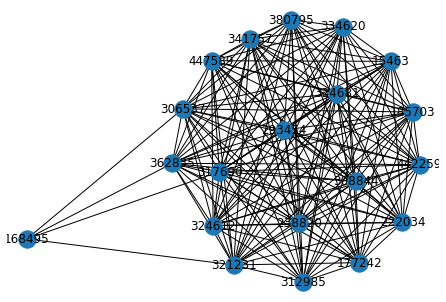

In [13]:
Gr_top_0 = G.subgraph(Gccr[0])
nx.draw(Gr_top_0, pos=nx.drawing.nx_agraph.graphviz_layout(Gr_top_0), with_labels=True)

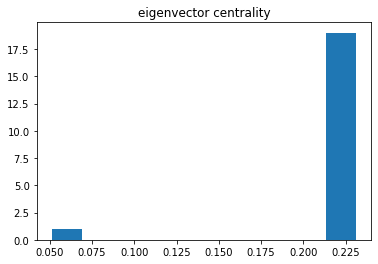

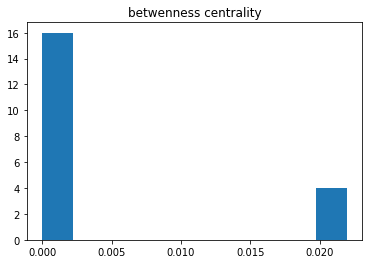

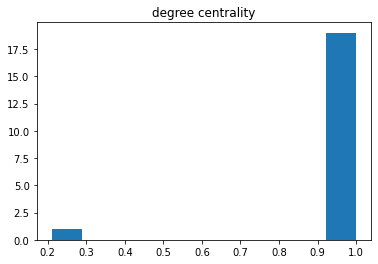

In [14]:
eigenvector_centrality, betwneeness_centrality, degree_centrality= centrality_analysis(Gr_top_0)

In [15]:
betwneeness_centrality

{324612: 0.0,
 442259: 0.0,
 312985: 0.0,
 334620: 0.0,
 168495: 0.0,
 324681: 0.0,
 293454: 0.0,
 321231: 0.021929824561403508,
 222034: 0.0,
 362835: 0.021929824561403508,
 177242: 0.0,
 238820: 0.0,
 447589: 0.0,
 185703: 0.0,
 15463: 0.0,
 306537: 0.021929824561403508,
 308844: 0.0,
 317690: 0.021929824561403508,
 380795: 0.0,
 341757: 0.0}

In [16]:
eigenvector_centrality
## Todos tienen una eigenvector centralidad similar excepto el nodo que se encuentra mas apartado
## La eigen centralidad es estar conectado a nodos importantes... 

{324612: 0.22854508641512794,
 442259: 0.22854508641512794,
 312985: 0.22854508641512794,
 334620: 0.22854508641512794,
 168495: 0.0512520228954877,
 324681: 0.22854508641512794,
 293454: 0.22854508641512794,
 321231: 0.23123601702678456,
 222034: 0.22854508641512794,
 362835: 0.23123601702678456,
 177242: 0.22854508641512788,
 238820: 0.22854508641512788,
 447589: 0.22854508641512788,
 185703: 0.22854508641512788,
 15463: 0.22854508641512788,
 306537: 0.23123601702678456,
 308844: 0.22854508641512788,
 317690: 0.23123601702678456,
 380795: 0.22854508641512794,
 341757: 0.22854508641512794}

In [33]:
summary_analysis(df, Gr_top_0 )

CRIME TYPE 
 16201.0    179
3375.0       3
92309.0      2
1430.0       2
3520.0       2
Name: CrimeType1, dtype: int64
MUNICIPALITY 
 66023    186
60013      2
65005      1
56010      1
58227      1
Name: Municipality, dtype: int64

 CRIME LOCATION
 60.0    125
1.0      15
0.0      15
19.0     13
55.0     13
Name: CrimeLocation, dtype: int64

 GENDER
 M    191
Name: OffenderGender, dtype: int64

 NUMBER_YOUTH
 0    191
Name: NumberYouthOffenders, dtype: int64


In [17]:
#Cometieron en su gran mayoria el crimen 226 y luego los crimenes 45 y 24 
#INTRO EF. ETA. COM. PUBL. 2 es la moda
# MEFAIT DOMMAGE 5000$ OU (daño hecho)
#AUTRES VOLS + 5000$ (asalto/robo)

#LA MAYORÍA DE LOS DELITOS SE CONCENTRARON EN UNA MUNICIPALIDAD 54048

#LA MAYORIA SE CONCENTRO EN COMERCIO O INDUSTRIA (4, 76 Y 80)

#TODOS HOMBRES

 #TODOS ADULTOS Y UN JOVEN



## Casp 2: extorsionadores

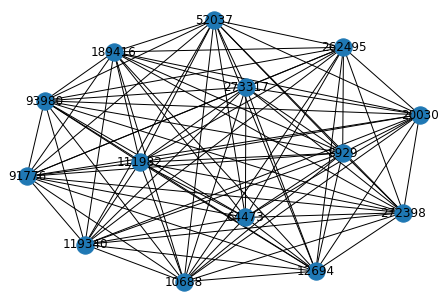

In [35]:
Gr_top_1 = G.subgraph(Gccr[1])
nx.draw(Gr_top_1, pos=nx.drawing.nx_agraph.graphviz_layout(Gr_top_1), with_labels=True)

red simetrica e interconectada: 

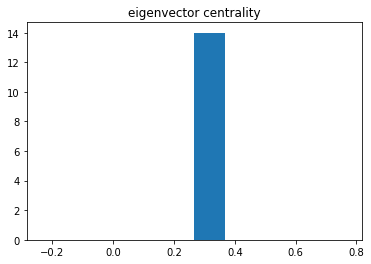

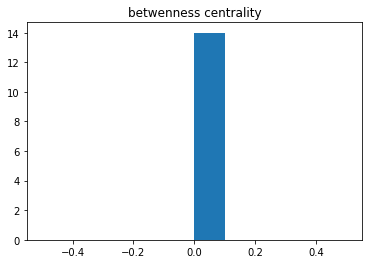

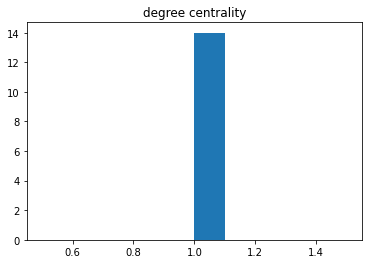

In [36]:
eigenvector_centrality, betwneeness_centrality, degree_centrality= centrality_analysis(Gr_top_1)

In [40]:
summary_analysis(df, Gr_top_1 )

CRIME TYPE 
 16201.0    179
3375.0       3
92309.0      2
1430.0       2
3520.0       2
Name: CrimeType1, dtype: int64
MUNICIPALITY 
 66023    186
60013      2
65005      1
56010      1
58227      1
Name: Municipality, dtype: int64

 CRIME LOCATION
 60.0    125
1.0      15
0.0      15
19.0     13
55.0     13
Name: CrimeLocation, dtype: int64

 GENDER
 M    191
Name: OffenderGender, dtype: int64

 NUMBER_YOUTH
 0    191
Name: NumberYouthOffenders, dtype: int64


## CASO 3: roba coches 

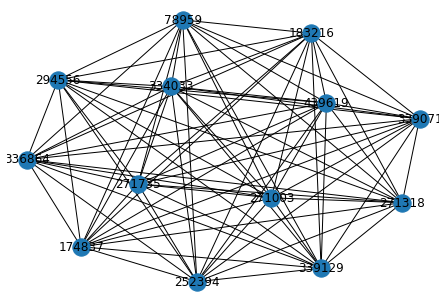

In [23]:
Gr_top_2 = G.subgraph(Gccr[2])
nx.draw(Gr_top_2, pos=nx.drawing.nx_agraph.graphviz_layout(Gr_top_2), with_labels=True)

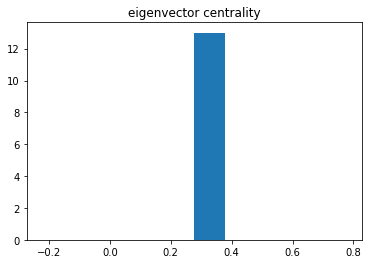

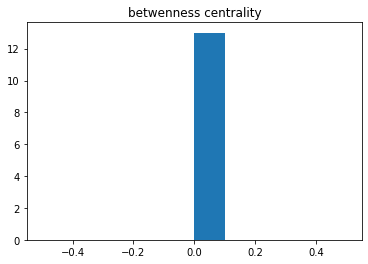

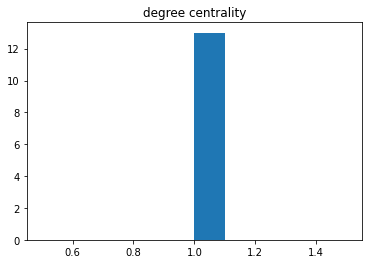

In [24]:
eigenvector_centrality, betwneeness_centrality, degree_centrality= centrality_analysis(Gr_top_2)

In [25]:
eigenvector_centrality 


{336864: 0.2773500981126145,
 439619: 0.2773500981126145,
 252394: 0.2773500981126145,
 78959: 0.2773500981126145,
 183216: 0.2773500981126145,
 334033: 0.2773500981126145,
 174837: 0.2773500981126145,
 271318: 0.2773500981126145,
 271735: 0.2773500981126145,
 339129: 0.2773500981126145,
 271003: 0.2773500981126145,
 294556: 0.2773500981126145,
 339071: 0.2773500981126145}

In [26]:
betwneeness_centrality

{336864: 0.0,
 439619: 0.0,
 252394: 0.0,
 78959: 0.0,
 183216: 0.0,
 334033: 0.0,
 174837: 0.0,
 271318: 0.0,
 271735: 0.0,
 339129: 0.0,
 271003: 0.0,
 294556: 0.0,
 339071: 0.0}

In [27]:

degree_centrality

{336864: 1.0,
 439619: 1.0,
 252394: 1.0,
 78959: 1.0,
 183216: 1.0,
 334033: 1.0,
 174837: 1.0,
 271318: 1.0,
 271735: 1.0,
 339129: 1.0,
 271003: 1.0,
 294556: 1.0,
 339071: 1.0}

In [41]:
summary_analysis(df,Gr_top_2)

CRIME TYPE 
 21352.0    119
21309.0     69
21351.0     24
2150.0      18
21355.0     13
Name: CrimeType1, dtype: int64
MUNICIPALITY 
 43027    94
23027    18
66023    18
45075    14
49058    13
47005    10
46075     9
39062     8
25213     7
42025     7
Name: Municipality, dtype: int64

 CRIME LOCATION
 5.0     116
1.0      67
9.0      32
72.0     16
4.0      13
Name: CrimeLocation, dtype: int64

 GENDER
 M    338
Name: OffenderGender, dtype: int64

 NUMBER_YOUTH
 0    338
Name: NumberYouthOffenders, dtype: int64


## Caso 4: MUJERES

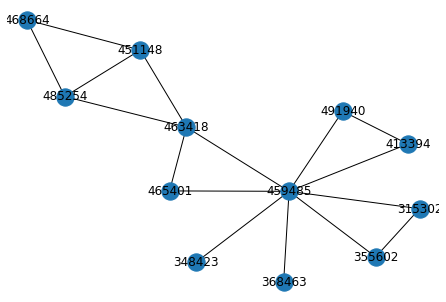

In [28]:
Gr_top_4 = G.subgraph(Gccr[4])
nx.draw(Gr_top_4, pos=nx.drawing.nx_agraph.graphviz_layout(Gr_top_4), with_labels=True)

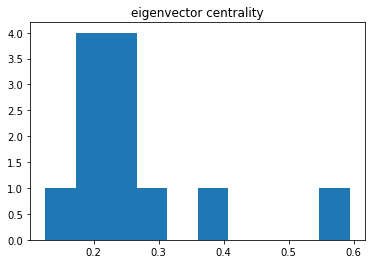

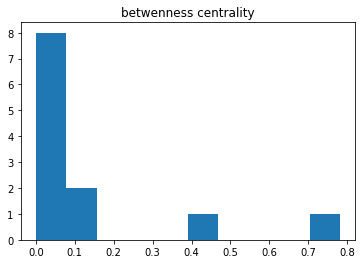

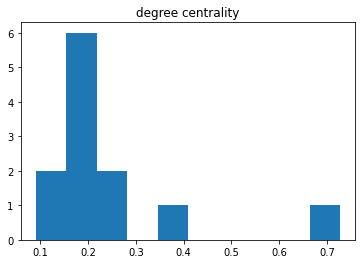

In [29]:
eigenvector_centrality, betwneeness_centrality, degree_centrality= centrality_analysis(Gr_top_4)

In [42]:
summary_analysis(df,Gr_top_4)

CRIME TYPE 
 21351.0    51
3520.0     32
3410.0     29
21201.0    19
21357.0    18
Name: CrimeType1, dtype: int64
MUNICIPALITY 
 91025    97
94068    56
91035    29
91030    25
91042    17
37067    16
23027    10
91020     8
93042     4
52007     3
Name: Municipality, dtype: int64

 CRIME LOCATION
 1.0     75
40.0    33
5.0     33
2.0     24
72.0    13
Name: CrimeLocation, dtype: int64

 GENDER
 M    265
F     10
Name: OffenderGender, dtype: int64

 NUMBER_YOUTH
 0    266
1      9
Name: NumberYouthOffenders, dtype: int64
